In [1]:
#include<TFile.h>
#include<TH1.h>
#include<TMath.h>
#include<TF1.h>
#include<TLine.h>
#include<TPoint.h>
#include<iostream>
#include<string>
#include<stdio.h>

In [2]:
// gROOT->SetStyle("ATLAS"); // Establecer estilo.
gStyle->SetOptStat("emr"); // Dibujar estadisticas de grafico.
gStyle->SetOptFit(1112);

In [3]:
TCanvas *c1 = new TCanvas("c1","The FillRandom example",10,10,900,600);
c1->SetGrid();

In [4]:
/*TFile *f=new TFile("//Analysis/Output_HZZAnalysis/data.root");
//TFile *f = new TFile("//Analysis/Output_HZZAnalysis/ggH125_ZZ4lep.root"); // Prueba MC gg->H125->ZZ->4lep.
mass_four_lep->Print(); // Test de lectura de datos*/

In [5]:
/*const Int_t n = 20;
const Double_t max_data = 135;
const Double_t min_data = 110;

TH1D *h_data = new TH1D("h_data","h_data",n,min_data,max_data); // Histograma de datos.
h_data->SetBinContent(1, 0);
h_data->SetBinContent(2, 1);
h_data->SetBinContent(3, 0);
h_data->SetBinContent(4, 1);
h_data->SetBinContent(5, 1);
h_data->SetBinContent(6, 6);
h_data->SetBinContent(7, 7);
h_data->SetBinContent(8, 2);
h_data->SetBinContent(9, 22);
h_data->SetBinContent(10, 30);
h_data->SetBinContent(11, 27);
h_data->SetBinContent(12, 20);
h_data->SetBinContent(13, 13);
h_data->SetBinContent(14, 9);
h_data->SetBinContent(15, 9);
h_data->SetBinContent(16, 13);
h_data->SetBinContent(17, 19);
h_data->SetBinContent(18, 11);
h_data->SetBinContent(19, 9);
h_data->SetBinContent(20, 0);

h_data->SetBinError(1, 0.38974303 );
h_data->SetBinError(2, 0.536510944);
h_data->SetBinError(3, 0.529702604);
h_data->SetBinError(4, 0.642001867);
h_data->SetBinError(5, 0.969341516);
h_data->SetBinError(6, 1.47611344);
h_data->SetBinError(7, 1.69797957);
h_data->SetBinError(8, 3.28577447);
h_data->SetBinError(9, 5.40784931);
h_data->SetBinError(10, 9.10106468);
h_data->SetBinError(11, 9.73541737);
h_data->SetBinError(12, 5.55019951);
h_data->SetBinError(13, 3.57914758);
h_data->SetBinError(14, 2.77877331);
h_data->SetBinError(15, 3.23697519);
h_data->SetBinError(16, 4.3608489);
h_data->SetBinError(17, 5.77172089);
h_data->SetBinError(18, 3.38666105);
h_data->SetBinError(19, 2.98861837);
h_data->SetBinError(20, 1.58402085);*/

In [6]:
const Int_t n = 4;
const Double_t max_data = 135;
const Double_t min_data = 110;

TH1D *h_data = new TH1D("h_data","h_data",n,min_data,max_data); // Histograma de datos.
h_data->SetBinContent(1, 1);
h_data->SetBinContent(2, 4);
h_data->SetBinContent(3, 2);
h_data->SetBinContent(4, 1);

In [7]:
Double_t myBWDist(Double_t* x, Double_t* par)
{   // Double_t x, Double_t mean, Double_t gamma
    return par[0]*TMath::BreitWigner(x[0], par[1], par[2]);
}

 FCN=0.144044 FROM MIGRAD    STATUS=CONVERGED     370 CALLS         371 TOTAL
                     EDM=6.18094e-10    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     6.34352e+01   2.54117e+01   1.18205e-02  -1.06400e-06
   2  Mean         1.21007e+02   2.09395e+00   1.04336e-03   1.40970e-05
   3  Standard deviation   9.25204e+00   6.81756e+00   3.05327e-03   3.02005e-06


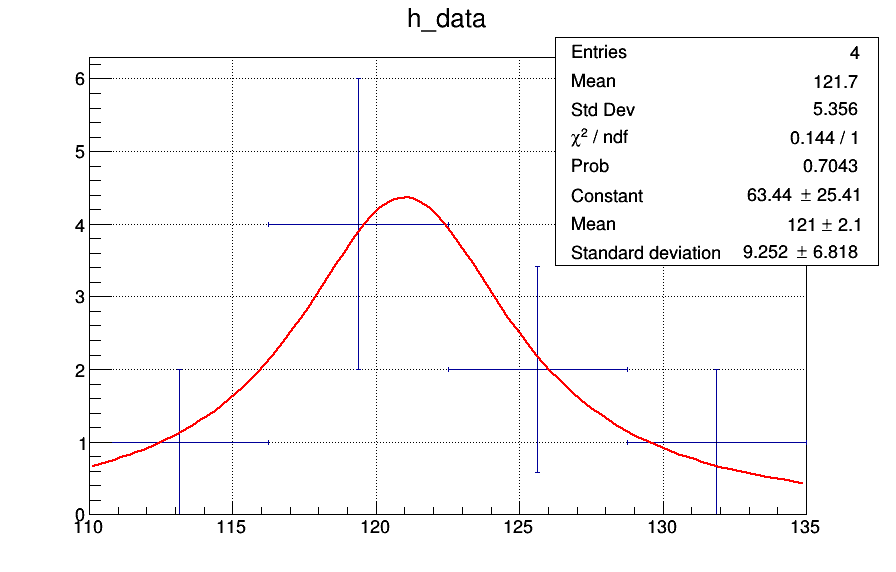

In [8]:
/*const Int_t n = 6;

TH1F *h_data = (TH1F*)f->Get("mass_four_lep");*/
h_data->Draw("E1"); // E1: Para representar los puntos con barras de error.

//auto pdf = new TF1("pdf","[0]*(2*sqrt(2)*[2]*[1]*(sqrt(pow([2],2)*(pow([2],2)+pow([1],2))))/(TMath::Pi()*sqrt(pow([2],2)+(sqrt(pow([2],2)*(pow([2],2)+pow([1],2)))))))/((pow((pow(x,2)-pow([2],2)),2))+(pow([2],2)*pow([1],2)))",110,140); //Función de Densidad de Probabilidad.
TF1 *pdf = new TF1("pdf","myBWDist",110,140,3);
pdf->SetParameters(1,h_data->GetMean(),h_data->GetStdDev());
pdf->SetParNames ("Constant","Mean","Standard deviation");
//auto pdf = new TF1("pdf","gaus",110,140); //Función de Densidad de Probabilidad.
//auto pdf = new TF1("pdf","landau",110,140); //Función de Densidad de Probabilidad.
//auto pdf = new TF1("pdf","expo",110,140);

//pdf->SetParameters(1,h_data->GetStdDev(),h_data->GetMean());
//pdf->SetParNames ("Constant","Standard deviation","Mean");
h_data->Fit("pdf","R"); // Puede usarse V para agregar más detalles estadísticos.
pdf->SetTitle("Fit");


TH1F *h_data_f = new TH1F("h_data_f","Test random numbers",n,min_data,max_data);
for (int i=0; i<n+1; i++) h_data_f->SetBinContent(i,pdf->Eval(h_data->GetXaxis()->GetBinCenter(i)));
//h_data_f->Draw("SAME");

c1->Draw();

In [9]:
// TFile myfile("fillrandom.root","RECREATE");
// pdf->Write();
// h_data_f->Write();

In [10]:
//apply the chi2 test and retrieve the residuals
Double_t res[n], x[n];
h_data->Chi2Test(h_data_f,"UW P",res);

Chi2 = 0.087199, Prob = 0.993328, NDF = 3, igood = 2


Info in <TH1D::Chi2TestX>: There is a bin in h2 with less than 10 effective events.



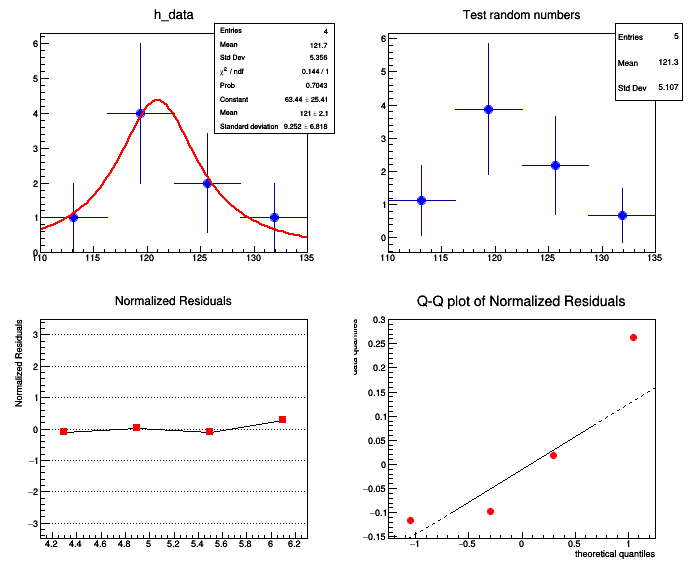

In [11]:
//Graph for Residuals
for (Int_t i=0; i<n; i++) x[i]= 4.+i*12./20.+12./40.;
TGraph *resgr = new TGraph(n,x,res);
resgr->GetXaxis()->SetRangeUser(4,16);
resgr->GetYaxis()->SetRangeUser(-3.5,3.5);
resgr->GetYaxis()->SetTitle("Normalized Residuals");
resgr->SetMarkerStyle(21);
resgr->SetMarkerColor(2);
resgr->SetMarkerSize(.9);
resgr->SetTitle("Normalized Residuals");
 
//Quantile-Quantile plot
TF1 *f = new TF1("f","TMath::Gaus(x,0,1)",-10,10);
TGraphQQ *qqplot = new TGraphQQ(n,res,f);
qqplot->SetMarkerStyle(20);
qqplot->SetMarkerColor(2);
qqplot->SetMarkerSize(.9);
qqplot->SetTitle("Q-Q plot of Normalized Residuals");
 
//create Canvas
TCanvas *c2 = new TCanvas("c2","Chistat Plot",10,10,700,600);
c2->Divide(2,2);
 
// Draw Histogramms and Graphs
c2->cd(1);
h_data->SetMarkerColor(4);
h_data->SetMarkerStyle(20);
 
h_data->Draw("E");
 
c2->cd(2);
h_data_f->Draw("E");
h_data_f->SetMarkerColor(4);
h_data_f->SetMarkerStyle(20);
 
c2->cd(3);
gPad->SetGridy();
resgr->Draw("APL");
 
c2->cd(4);
qqplot->Draw("AP");
 
c2->cd(0);

c2->Draw();
c2->Update();

Esqueleto del código:
https://root.cern/doc/v610/fillrandom_8C.html

Ejemplo aplicación Chi2:
https://root.cern/doc/v610/chi2test_8C_source.html
http://www.hep.by/root/TH1.html#TH1:Chi2Test
http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.173.6388&rep=rep1&type=pdf
https://arxiv.org/pdf/physics/0605123.pdf

Funciones pruebas de bondad:
KolmogorovTest
Chi2Test